# Exercise: Xarray Fundamentals with Atmospheric Radiation Data

In this exercise, we will use `xarray` to analyze top-of-atmosphere radiation data from [NASA's CERES project](https://ceres.larc.nasa.gov/).


![](../assets/energy_balance.jpg) 


image credit: Public domain, by NASA, from Wikimedia Commons


A pre-downloaded and subsetted a portion of the CERES dataset is available here: http://ldeo.columbia.edu/~rpa/CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc. The size of the data file is 702.53 MB. It may take a few minutes to download.

Please review the CERES [FAQs](https://ceres.larc.nasa.gov/resources/faqs) before getting started.

Start by importing Numpy, Matplotlib, and Xarray. Set the default figure size to (12, 6).

In [1]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (12, 6)


Next, download the NetCDF file using pooch.

In [2]:
import pooch
fname = pooch.retrieve(
    'http://ldeo.columbia.edu/~rpa/CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc',
    known_hash='a876cc7106e7dcb1344fbec5dcd7510e5cd947e62049a8cbc188ad05ffe00345'
)
print(fname)

/Users/wb19586/Library/Caches/pooch/8e18cca34f0b893a1829cf86ad4b7c49-CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc


## 1) Opening data and examining metadata

### 1.1) Open the dataset and display its contents 
The downloaded filename will be `fname`.


In [199]:
# open downloaded dataset in cahche directory
ds = xr.open_dataset(fname)

# display dataset contentes
ds

<xarray.Dataset>
Dimensions:                      (lon: 360, time: 203, lat: 180)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * time                         (time) datetime64[ns] 2000-03-15 ... 2017-01-15
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables: (12/14)
    toa_sw_all_mon               (time, lat, lon) float32 ...
    toa_lw_all_mon               (time, lat, lon) float32 ...
    toa_net_all_mon              (time, lat, lon) float32 ...
    toa_sw_clr_mon               (time, lat, lon) float32 ...
    toa_lw_clr_mon               (time, lat, lon) float32 ...
    toa_net_clr_mon              (time, lat, lon) float32 ...
    ...                           ...
    toa_cre_net_mon              (time, lat, lon) float32 ...
    solar_mon                    (time, lat, lon) float32 ...
    cldarea_total_daynight_mon   (time, lat, lon) float32 ...
    cldpress_total_daynight_mon  (time, lat, lon) float32 ...
    cldtemp_total_daynight_mon   (time, lat, lon) float32 ...
    cldtau_total_day_mon         (time, lat, lon) float32 ...
Attributes:
    title:             CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Mo...
    institution:       NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:       CF-1.4
    comment:           Data is from East to West and South to North.
    Version:           Edition 4.0; Release Date March 7, 2017
    Fill_Value:        Fill Value is -999.0
    DOI:               10.5067/TERRA+AQUA/CERES/EBAF-TOA_L3B.004.0
    Production_Files:  List of files used in creating the present Master netC...

### 1.2) Print out the `long_name` attribute of each variable
Print `variable`: `long name` for each variable. Format the output so that the start of the `long name` attributes are aligned. 

In [4]:
# we can loop over each variable in the dataset
for var in ds.variables:
    
    # access the 'long_name' attribute for each variable
    long_name = ds[var].long_name
    
    # print the formatted output (see documentation at https://docs.python.org/3/tutorial/inputoutput.html) 
    print(f"{var:30} {long_name}")
    

lon                            longitude
toa_sw_all_mon                 Top of The Atmosphere Shortwave Flux, Monthly Means, All-Sky conditions
toa_lw_all_mon                 Top of The Atmosphere Longwave Flux, Monthly Means, All-Sky conditions
toa_net_all_mon                Top of The Atmosphere Net Flux, Monthly Means, All-Sky conditions
toa_sw_clr_mon                 Top of The Atmosphere Shortwave Flux, Monthly Means, Clear-Sky conditions
toa_lw_clr_mon                 Top of The Atmosphere Longwave Flux, Monthly Means, Clear-Sky conditions
toa_net_clr_mon                Top of The Atmosphere Net Flux, Monthly Means, Clear-Sky conditions
toa_cre_sw_mon                 Top of The Atmosphere Cloud Radiative Effects Shortwave Flux, Monthly Means
toa_cre_lw_mon                 Top of The Atmosphere Cloud Radiative Effects Longwave Flux, Monthly Means
toa_cre_net_mon                Top of The Atmosphere Cloud Radiative Effects Net Flux, Monthly Means
solar_mon                      Inco

## 2) Basic reductions, arithmetic, and plotting

### 2.1) Calculate the time-mean of the entire dataset

In [15]:
# original size
print(ds.sizes)

# calculate time mean and preserve the attributes/metadata 
# https://docs.xarray.dev/en/stable/generated/xarray.DataArray.mean.html
ds_time_mean = ds_selected.mean(dim="time", keep_attrs=True)

# new size
print(ds_time_mean.sizes)

Frozen({'lon': 360, 'time': 203, 'lat': 180})
Frozen({'lon': 360, 'lat': 180})


In [6]:
ds_time_mean

<xarray.Dataset>
Dimensions:                      (lon: 360, lat: 180)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables: (12/14)
    toa_sw_all_mon               (lat, lon) float32 122.8 122.8 ... 103.8 103.8
    toa_lw_all_mon               (lat, lon) float32 141.2 141.2 ... 194.1 194.1
    toa_net_all_mon              (lat, lon) float32 -91.25 -91.25 ... -126.5
    toa_sw_clr_mon               (lat, lon) float32 120.2 120.2 ... 89.4 89.4
    toa_lw_clr_mon               (lat, lon) float32 140.3 140.3 ... 200.4 200.4
    toa_net_clr_mon              (lat, lon) float32 -87.82 -87.82 ... -118.3
    ...                           ...
    toa_cre_net_mon              (lat, lon) float32 -3.428 -3.426 ... -8.22
    solar_mon                    (lat, lon) float32 172.7 172.7 ... 171.4 171.4
    cldarea_total_daynight_mon   (lat, lon) float32 51.81 51.81 ... 78.58 78.58
    cldpress_total_daynight_mon  (lat, lon) float32 485.7 485.7 ... 767.6 767.6
    cldtemp_total_daynight_mon   (lat, lon) float32 225.2 225.2 ... 247.9 247.9
    cldtau_total_day_mon         (lat, lon) float32 4.141 4.141 ... 4.8 4.8
Attributes:
    title:             CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Mo...
    institution:       NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:       CF-1.4
    comment:           Data is from East to West and South to North.
    Version:           Edition 4.0; Release Date March 7, 2017
    Fill_Value:        Fill Value is -999.0
    DOI:               10.5067/TERRA+AQUA/CERES/EBAF-TOA_L3B.004.0
    Production_Files:  List of files used in creating the present Master netC...

### 2.2) From this, make a 2D plot of the the time-mean Top of Atmosphere (TOA) Longwave, Shortwave, and Incoming Solar Radiation
(Use "All-Sky" conditions)

Note the sign conventions on each variable.

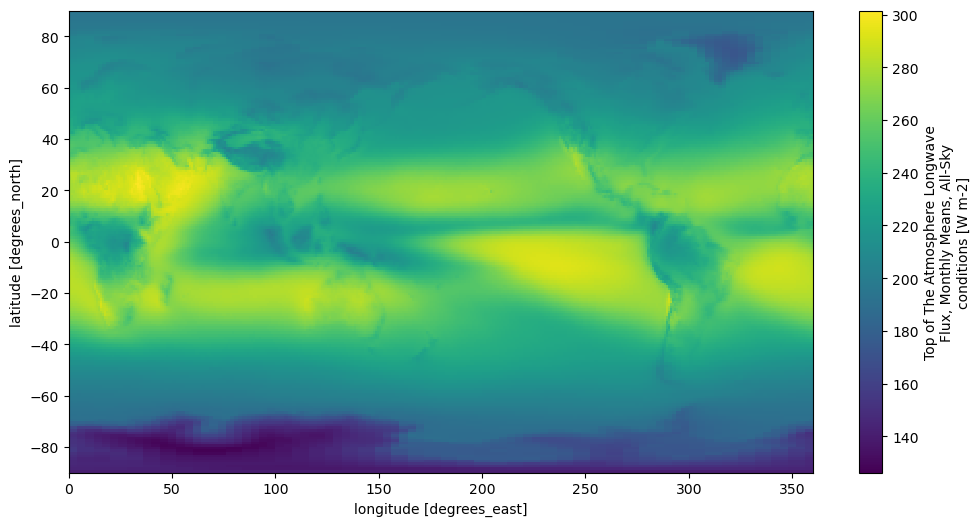

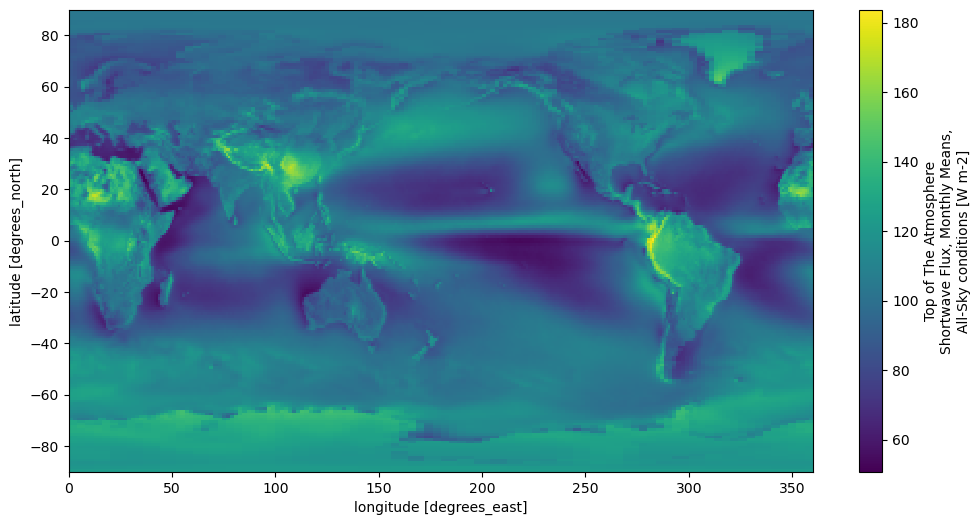

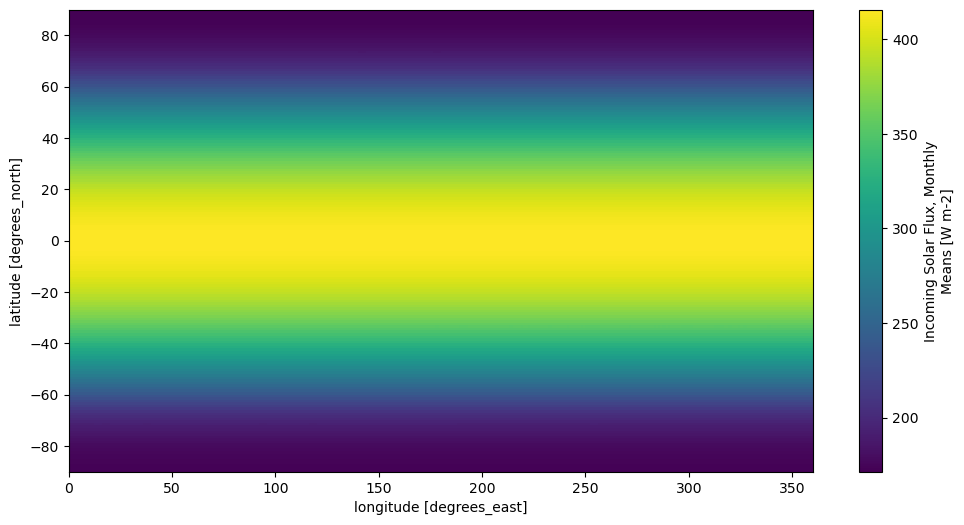

In [7]:
# list of variables to plot
var_list = ["toa_lw_all_mon", "toa_sw_all_mon", "solar_mon"]

# we create three individual figures here
for num_var,var in enumerate(var_list):
    fig, ax = plt.subplots()
    ds_time_mean[var].plot()
    
# we could also create one figure with three subplots with
# fig, ax = plt.subplots(3, 1)
# and then provide the axes argument to the xarray plot command, e.g.:
# for num_var,var in enumerate(var_list):
#     ds_time_mean[var].plot(ax=ax[num_var])

### 2.3) Add up the three variables above and verify (visually) that they are equivalent to the TOA net flux

You have to pay attention to and think carefully about the sign conventions (positive or negative) for each variable in order for the variables to sum to the right TOA net flux. Refer to the NASA figure at the top of the page to understand incoming and outgoing radiation.

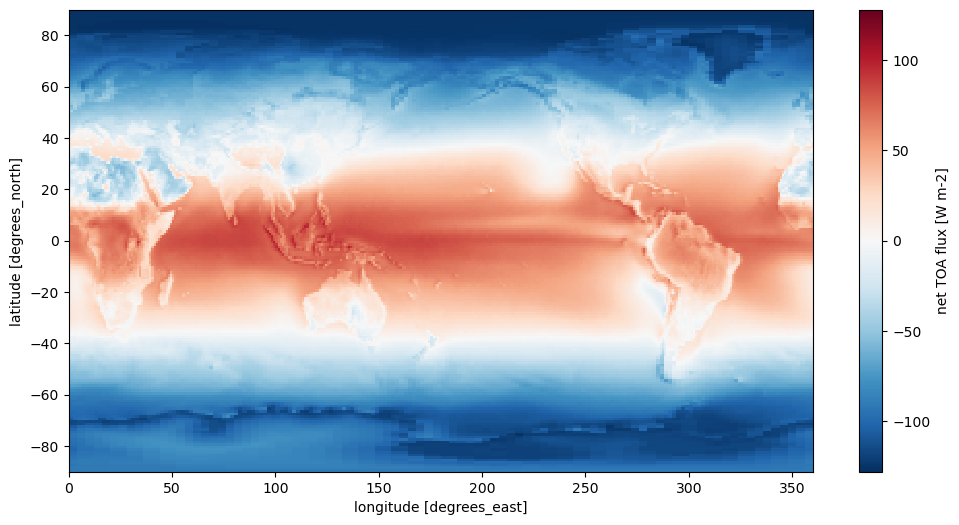

In [8]:
# for the TOA balance we assume incoming fluxes to be positive, outgoing fluxes to be negative
# this means the solar insolation should be balanced by the outgoing SW and LW radiation

# solar = SW_TOA + LW_TOA
# -> net balance = solar - SW_TOA - LW_TOA

net_TOA_flux = ds_time_mean["solar_mon"] - ds_time_mean["toa_sw_all_mon"] - ds_time_mean["toa_lw_all_mon"]

# define attributes from dictionary (see https://docs.xarray.dev/en/stable/generated/xarray.DataArray.html)
net_TOA_flux.attrs = {
    "units": ds_time_mean["solar_mon"].units,
    "long_name": "net TOA flux"}

# quick plot of the results
net_TOA_flux.plot()


## 3) Mean and weighted mean

### 3.1) Calculate the global (unweighted) mean of TOA net radiation

Since the Earth is approximately in radiative balance, the net TOA radiation should be zero. But taking the naive mean from this dataset, you should find a number far from zero. Why?

In [9]:
# lets remind ourselves of the size and dimensions of our new DataArray
print(net_TOA_flux.sizes)

TOA_imbalance_global = net_TOA_flux.mean(dim=["lat", "lon"])

print(f" unweighted global mean net radiation balance: {TOA_imbalance_global:.2f} {net_TOA_flux.units}")


Frozen({'lat': 180, 'lon': 360})
 unweighted global mean net radiation balance: -28.71 W m-2


The answer is that each "pixel" or "grid point" of this dataset does not represent an equal area of Earth's surface. So naively taking the mean, i.e. giving equal weight to each point, gives the wrong answer.

On a lat / lon grid, the relative area of each grid point is proportional to $\cos(\lambda)$. ($\lambda$ is latitude)

### 3.2) Create a `weight` array proportional to $\cos(\lambda)$
Think carefully a about radians vs. degrees.

<xarray.DataArray 'lat' (lat: 180)>
array([-89.5, -88.5, -87.5, -86.5, -85.5, -84.5, -83.5, -82.5, -81.5, -80.5,
       -79.5, -78.5, -77.5, -76.5, -75.5, -74.5, -73.5, -72.5, -71.5, -70.5,
       -69.5, -68.5, -67.5, -66.5, -65.5, -64.5, -63.5, -62.5, -61.5, -60.5,
       -59.5, -58.5, -57.5, -56.5, -55.5, -54.5, -53.5, -52.5, -51.5, -50.5,
       -49.5, -48.5, -47.5, -46.5, -45.5, -44.5, -43.5, -42.5, -41.5, -40.5,
       -39.5, -38.5, -37.5, -36.5, -35.5, -34.5, -33.5, -32.5, -31.5, -30.5,
       -29.5, -28.5, -27.5, -26.5, -25.5, -24.5, -23.5, -22.5, -21.5, -20.5,
       -19.5, -18.5, -17.5, -16.5, -15.5, -14.5, -13.5, -12.5, -11.5, -10.5,
        -9.5,  -8.5,  -7.5,  -6.5,  -5.5,  -4.5,  -3.5,  -2.5,  -1.5,  -0.5,
         0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,   9.5,
        10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,  18.5,  19.5,
        20.5,  21.5,  22.5,  23.5,  24.5,  25.5,  26.5,  27.5,  28.5,  29.5,
        30.5,  31.5,  32.5,  33.5,  34.5

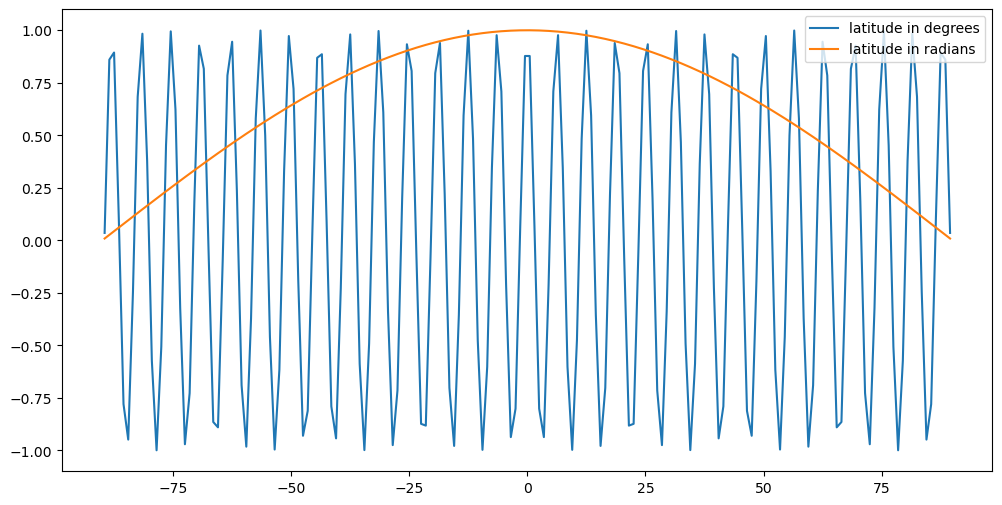

In [10]:
# we need one weight for each latitude
print(net_TOA_flux.lat)

# let's quickly check whether to use degrees or radians for our latitudes
plt.plot(net_TOA_flux.lat, np.cos(net_TOA_flux.lat), label = "latitude in degrees")
plt.plot(net_TOA_flux.lat, np.cos(np.deg2rad(net_TOA_flux.lat)), label = "latitude in radians")
plt.legend(loc="upper right")

In [11]:
# we need to convert latitude to radians to have a weight of 1 in the tropics and a weight of 0 at the poles
weights = np.cos(np.deg2rad(net_TOA_flux.lat))


### 3.3) Redo your global mean TOA net radiation calculation with this weight factor

Use xarray's [weighted array reductions](http://xarray.pydata.org/en/stable/user-guide/computation.html#weighted-array-reductions) to compute the weighted mean.

In [14]:
# this was the unweighted mean from before
TOA_imbalance_global = net_TOA_flux.mean(dim=["lat", "lon"])

# we can simply add the weights to the DataArray
TOA_flux_weighted = net_TOA_flux.weighted(weights)
print(TOA_flux_weighted)

# and then calculate the mean in the same way as before (xarray will apply the weights automatically)
TOA_imbalance_global_weighted = TOA_flux_weighted.mean(dim=["lat", "lon"])

print(f" unweighted global mean net radiation balance: {TOA_imbalance_global:.2f} {net_TOA_flux.units}")
print(f" weighted global mean net radiation balance  : {TOA_imbalance_global_weighted:.2f} {net_TOA_flux.units}")


DataArrayWeighted with weights along dimensions: lat
 unweighted global mean net radiation balance: -28.71 W m-2
 weighted global mean net radiation balance  : 0.92 W m-2


This time around, you should have found something much closer to zero. Why is it not zero? If you want, have a look at the relevant [chapter in the latest IPCC report](https://www.ipcc.ch/report/ar6/wg1/downloads/report/IPCC_AR6_WGI_Chapter07.pdf) and compare your result with their TOA imbalance. 

### 3.4) Now that you have a `weight` factor, verify that the TOA incoming solar, outgoing longwave, and outgoing shortwave approximately match up with infographic shown in the first cell of this assignment

In [ ]:
# let's calculate the global means for the three individual fields as well
var_list = ["toa_lw_all_mon", "toa_sw_all_mon", "solar_mon"]

for var in var_list:
    global_mean = ds_time_mean[var].weighted(weights).mean(dim=["lat", "lon"])
    print(f" global mean of {ds[var].long_name:71}: {global_mean:.1f} {net_TOA_flux.units}")

## 4) Meridional Heat Transport Calculation

We can go beyond a weight factor and actually calculate the area of each pixel of the dataset, using the formula

$$ dA = R^2 \cos(\lambda) d\lambda d \varphi $$

where $d\lambda$ and $d\varphi$ are the spacing of the points in latitude and longitude (measured in radians). We can approximate Earth's radius as $R = 6,371$ km.

### 4.1) calculate the pixel area using this formula and create a 2D (lon, lat) DataArray for it

(Xarray's `ones_like` function can help you easily create and broadcast DataArrays.) Verify that the sum of all the pixels equals the Earth's true surface area as evaluated using the formula for the area of a sphere.

In [98]:
# unit of fluxes is W m-2, so we need to know area of each grid point to calculate area integrated fluxes
# we therefore need a global 2D field (lon, lat) that represents the surface area of each pixel/grid point in m2

pixel_area = xr.ones_like(net_TOA_flux)

# set attributes
pixel_area.attrs = {
    "units": "m2",
    "long_name": "pixel surface area"}

print(pixel_area)

<xarray.DataArray (lat: 180, lon: 360)>
array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)
Coordinates:
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
Attributes:
    units:      m2
    long_name:  pixel surface area


In [99]:
# we can use above formula to calculate the pixel area at each latitude (it is the same at each longitude)

# first calculate the grid spacing (it is constant in our case)
# quickly check with plt.plot(pixel_area.lat) and plt.plot(pixel_area.lon)
delta_lat = np.deg2rad(pixel_area.lat[1] - pixel_area.lat[0])
delta_lon = np.deg2rad(pixel_area.lon[1] - pixel_area.lon[0])

# use above equation to calculate latitudinal dependence of dA
dA = 6_371_000**2 * np.cos(np.deg2rad(pixel_area.lat)) * delta_lat * delta_lon
# dA has size of (lat:180) 
print(dA.size)

# we can then simply multiply our pixel_area filled with ones with the area at each latitude dA
# xarray will take care of the broadcasting from (lat) to (lat, lon)
pixel_area *= dA

# this would be the same as explicitly looping over each grid point (this method is correct, but much slower)
# for i in range(len(pixel_area.lon)):
#     for j in range(len(pixel_area.lat)):
#         pixel_area[j, i] = 6_371_000**2 * np.cos(np.deg2rad(pixel_area.lat[j])) * delta_lat * delta_lon

180


Calculated global surface area of Earth          : 510070954 km2
Expected global surface area of Earth (Wikipedia): 510072000 km2


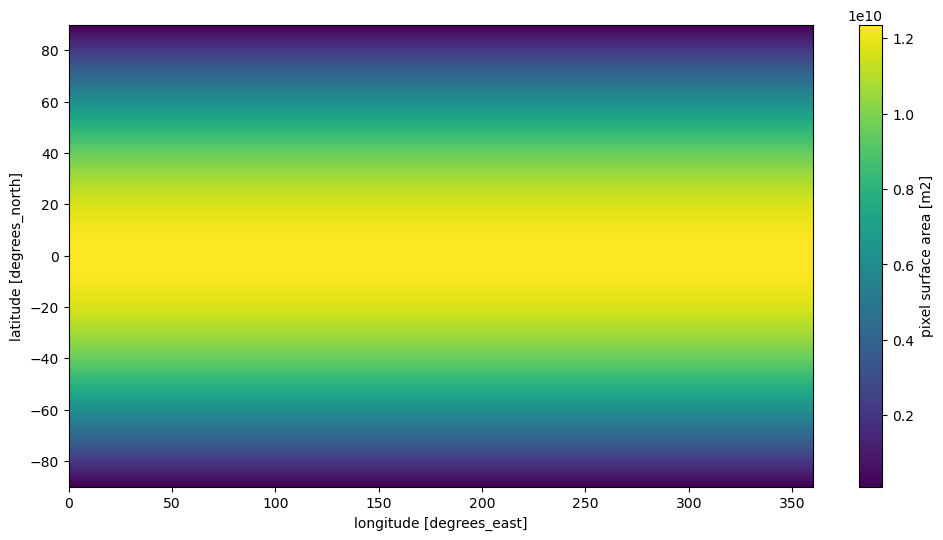

In [100]:
# we plot the field and calculate gloabl surface area for quick sanity check
pixel_area.plot()

print(f"Calculated global surface area of Earth          : {pixel_area.sum() / 1e6:.0f} km2")
print(f"Expected global surface area of Earth (Wikipedia): {510072000:.0f} km2")


### 4.2) Calculate and plot the total amount of net radiation in each pixel
Multiplying the pixel area (m$^2$) from above with the radiative flux (W m$^{-2}$) gives you the total amount of radiation absorbed in each pixel in W.

Label with correct units.

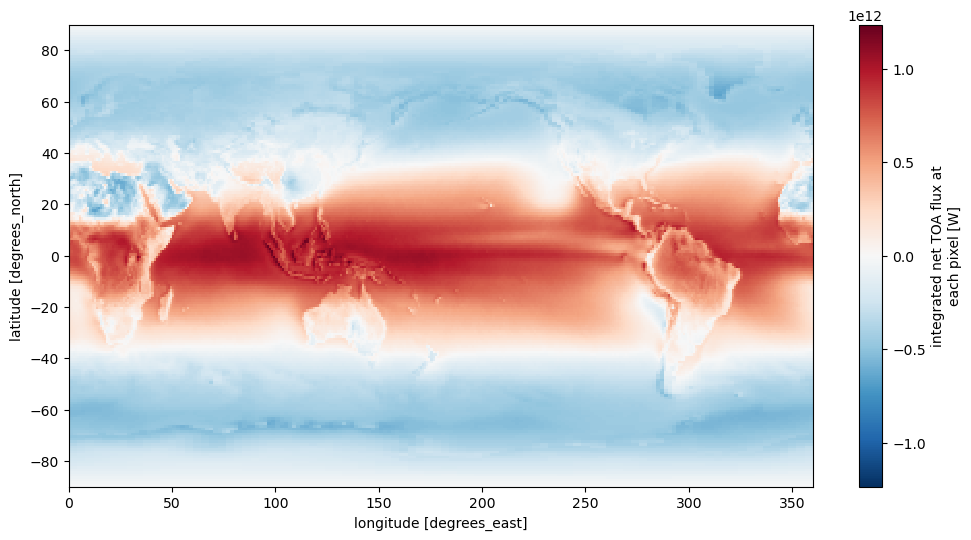

In [106]:
# muliplying both 2D fields gives us the integrated net flux at each pixel
total_pixel_flux = net_TOA_flux * pixel_area

# set attributes
total_pixel_flux.attrs = {
    "units": "W",
    "long_name": "integrated net TOA radiation at each pixel"}

total_pixel_flux.plot()

### 4.3) Plot the cumulative sum of the total amount of net radiation as a function of latitude

Label with correct units. (Hint: check out xarray's [cumsum](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.cumsum.html) function.)

This curve tells you how much energy must be transported meridionally by the ocean and atmosphere in order to account for the radiative imbalance at the top of the atmosphere.

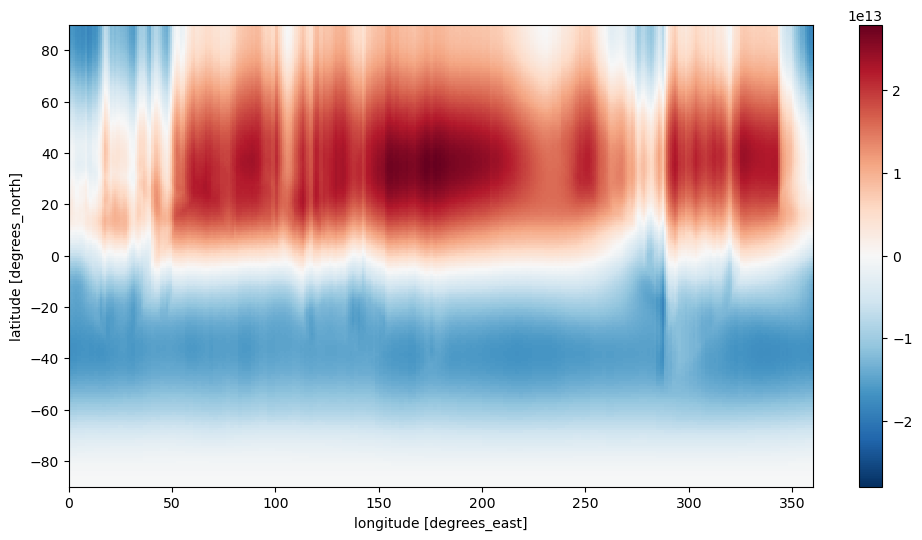

In [138]:
# start by calculating the cumulative North-South energy imbalance at each longitude
cumulative_balance = total_pixel_flux.cumsum(dim="lat")
cumulative_balance.plot()


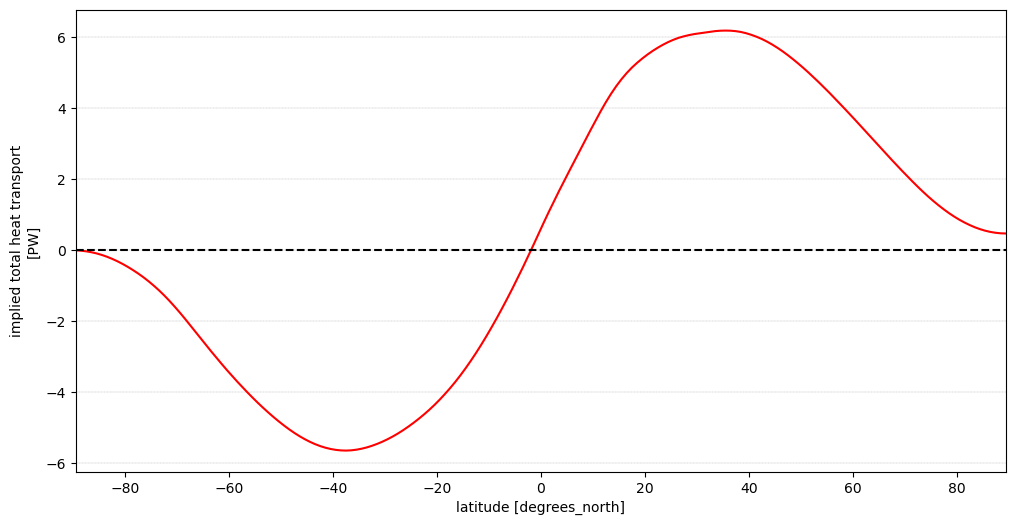

In [164]:
# then sum along all longitudes to caclulate total energy balance
total_balance = cumulative_balance.sum(dim="lon")

# convert from W to PW
total_balance /= 1e15

# set attributes
total_balance.attrs = {
    "units": "PW",
    "long_name": "implied total heat transport"}

# some plot options
fig, ax = plt.subplots()
total_balance.plot(ax=ax, color="r")
ax.hlines(y=0, xmin=np.min(total_pixel_flux.lat), xmax=np.max(total_pixel_flux.lat), linestyles='--', color="k")
ax.set_xlim(np.min(total_pixel_flux.lat), xmax=np.max(total_pixel_flux.lat))
ax.grid(axis = "y", color = "gray", linewidth = 0.2, linestyle='--')

You should get a curve that looks something like this: https://journals.ametsoc.org/view/journals/clim/14/16/full-i1520-0442-14-16-3433-f07.gif (Figure from Trenberth & Caron, 2001)

## 5) Selecting and Merging Data

For the next problem, use the following approximate locations of four different cities.

| city | lon | lat |
| -- | -- | -- |
| NYC |74 W | 40 N | 
| Nome, Alaska | 165 W | 64 N | 
| Columbo, Sri Lanka | 80 E | 7 N |
| Hobart, Tasmania | 147 E | 43 S |


### 5.1) Create a `Dataset` for each point from the global dataset
Each city should get its own `Dataset` with the same variables as the one you imported. Find the nearest associated incoming solar radiation and net radiation timeseries at each city.

In [239]:
# convert city locations to nested dictionary
city_dict = {
    "NYC": {
        "lon" : -74.0,
        "lat" : 40.0
    },
    "Nome, Alaska": {
        "lon" : -165.0,
        "lat" : 64.0
    },
    "Columbo, Sri Lanka": {
        "lon" : 80.0,
        "lat" : 7.0
    },
    "Hobart, Tasmania": {
        "lon" : 147.0,
        "lat" : -43.0
    }
}

In [246]:
# longitude coordinate in dataset goes from [0, 360], we need to convert to [-180,180]
# you could also keep the dataset coordinates and change those in your city_dict

# start with a copy of the dataset
ds_shifted = ds.copy()

# confirm old longitudes
old_lons = ds_shifted["lon"]
print("old longitudes: ", old_lons[-10:].values) 

# calculate new longitudes
new_lons = xr.where(old_lons > 180., old_lons - 360., old_lons)
print("new longitudes: ", new_lons[-10:].values) 

# assign convert longituide coordinates
ds_shifted = ds_shifted.assign_coords(lon=new_lons)
# get monotonically increasing longitudes
ds_shifted = ds_shifted.sortby('lon')


old longitudes:  [350.5 351.5 352.5 353.5 354.5 355.5 356.5 357.5 358.5 359.5]
new longitudes:  [-9.5 -8.5 -7.5 -6.5 -5.5 -4.5 -3.5 -2.5 -1.5 -0.5]


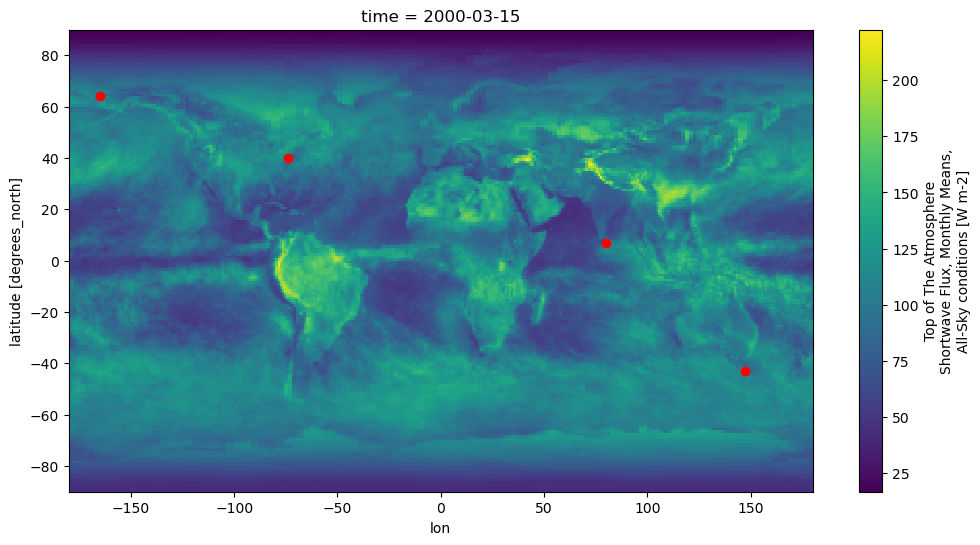

In [247]:
# quick check that longitude coordinates are shifted as expected
ds_shifted["toa_sw_all_mon"].isel(time=0).plot()
for city in city_dict.keys():
    plt.scatter(city_dict[city]["lon"], city_dict[city]["lat"], color='r')

In [249]:
# loop over each city and select the nearest grid point time series
for city in city_dict.keys():
    ds_city = ds_shifted.sel(lat=city_dict[city]["lat"], lon=city_dict[city]["lon"], method='nearest')
    print(ds_city)

# instead of overwriting the dataset in the loop, we could also store them as individual keys in a dictionary of datasets
# ds_dicts = {}
# for city in city_dict.keys():
#     ds_dicts[city] = ds_shifted.sel(lat=city_dict[city]["lat"], lon=city_dict[city]["lon"], method='nearest')

<xarray.Dataset>
Dimensions:                      (time: 203)
Coordinates:
    lon                          float32 -73.5
  * time                         (time) datetime64[ns] 2000-03-15 ... 2017-01-15
    lat                          float32 40.5
Data variables: (12/14)
    toa_sw_all_mon               (time) float32 ...
    toa_lw_all_mon               (time) float32 ...
    toa_net_all_mon              (time) float32 ...
    toa_sw_clr_mon               (time) float32 ...
    toa_lw_clr_mon               (time) float32 ...
    toa_net_clr_mon              (time) float32 ...
    ...                           ...
    toa_cre_net_mon              (time) float32 ...
    solar_mon                    (time) float32 ...
    cldarea_total_daynight_mon   (time) float32 ...
    cldpress_total_daynight_mon  (time) float32 ...
    cldtemp_total_daynight_mon   (time) float32 ...
    cldtau_total_day_mon         (time) float32 ...
Attributes:
    title:             CERES EBAF (Energy Balanced an

### 5.2) Merge these four datasets into a new dataset with the new dimension `city`

Create a new dimension coordinate to hold the city name.
Display the merged dataset.

In [297]:
# loop over each city and select the nearest grid point time series
for num_city,city in enumerate(city_dict.keys()):
    ds_city = ds_shifted.sel(lat=city_dict[city]["lat"], lon=city_dict[city]["lon"], method='nearest')
    if num_city == 0:
        # create new combined dataset during first iteration
        ds_cities = ds_city.copy()
    else:
        # concatenate datasets along new "city" dimension
        ds_cities = xr.concat([ds_cities, ds_city], "city")

# assign coordinates to new "city" dimension for easy selection and automatic legends
ds_cities = ds_cities.assign_coords(city=("city", list(city_dict.keys())))
print(ds_cities)


<xarray.Dataset>
Dimensions:                      (city: 4, time: 203)
Coordinates:
    lon                          (city) float32 -73.5 -164.5 80.5 147.5
  * time                         (time) datetime64[ns] 2000-03-15 ... 2017-01-15
    lat                          (city) float32 40.5 64.5 7.5 -42.5
  * city                         (city) <U18 'NYC' ... 'Hobart, Tasmania'
Data variables: (12/14)
    toa_sw_all_mon               (city, time) float32 89.36 155.3 ... 137.6
    toa_lw_all_mon               (city, time) float32 223.2 216.2 ... 259.2
    toa_net_all_mon              (city, time) float32 8.813 31.08 ... 97.02
    toa_sw_clr_mon               (city, time) float32 38.75 47.61 ... 75.11
    toa_lw_clr_mon               (city, time) float32 253.2 259.4 ... 284.6
    toa_net_clr_mon              (city, time) float32 29.48 95.62 ... 134.2
    ...                           ...
    toa_cre_net_mon              (city, time) float32 -20.66 -64.55 ... -37.13
    solar_mon           

### 5.3) Plot the incoming solar and net radiation at each city

Make two separate plots.
Try to have your legend created automatically from the data.

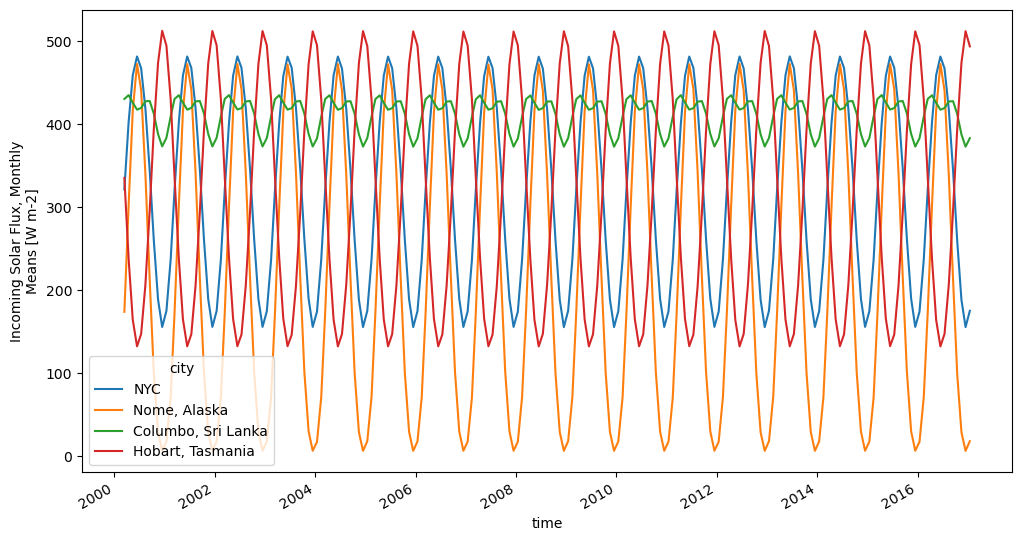

In [305]:
# the "hue" arguments lets us define whic information to use to color the lines
# the legend will be automatically created if we set the correct coordinates for the "city" dimension
f = ds_cities["solar_mon"].plot(hue="city")

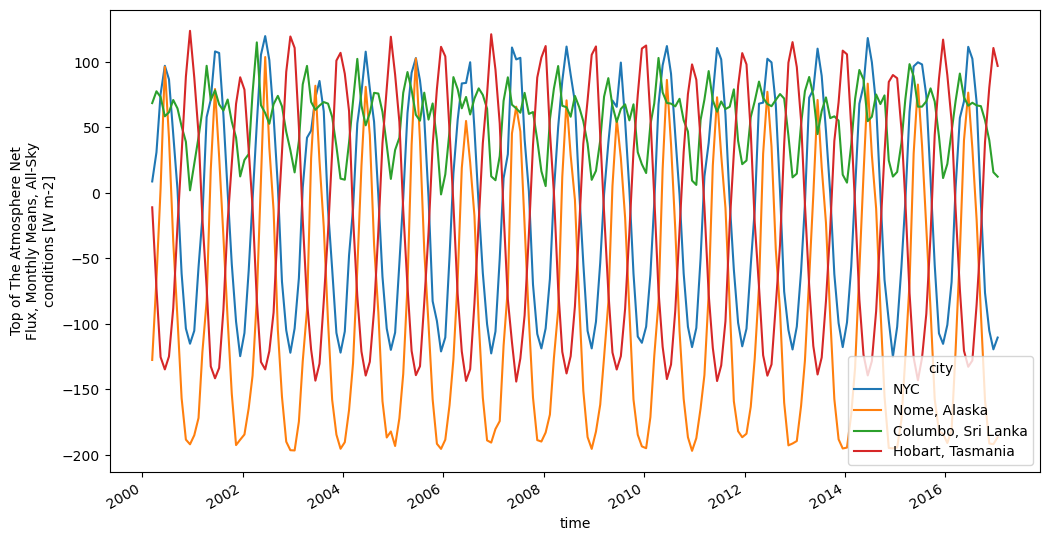

In [306]:
f = ds_cities["toa_net_all_mon"].plot(hue="city")

## Credits
This exercise is from the "Earth and Environmental Data Science Book" by Ryan Abernathey available at https://earth-env-data-science.github.io/intro.html.

All content is licensed under the [Creative Commons Attribution-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-sa/4.0/) (CC BY-SA 4.0) license.

It is definetely worth to have a closer look at the book as it covers very similar topics as our course. There are also more xarray exercises if you want to get some more practice.

## [[Previous: Raster data in xarray¶](./04-rasters.ipynb)] | [[Next: Cartopy maps¶](./06-cartopy.ipynb)]